<a href="https://colab.research.google.com/github/YarinBekor/BreastCancerDetection/blob/main/breast_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load data

In [ ]:
raw_df = pd.read_csv('breast-cancer-wisconsin-data/data.csv')
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Preprocess

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = raw_df.drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

## Fiture distributions

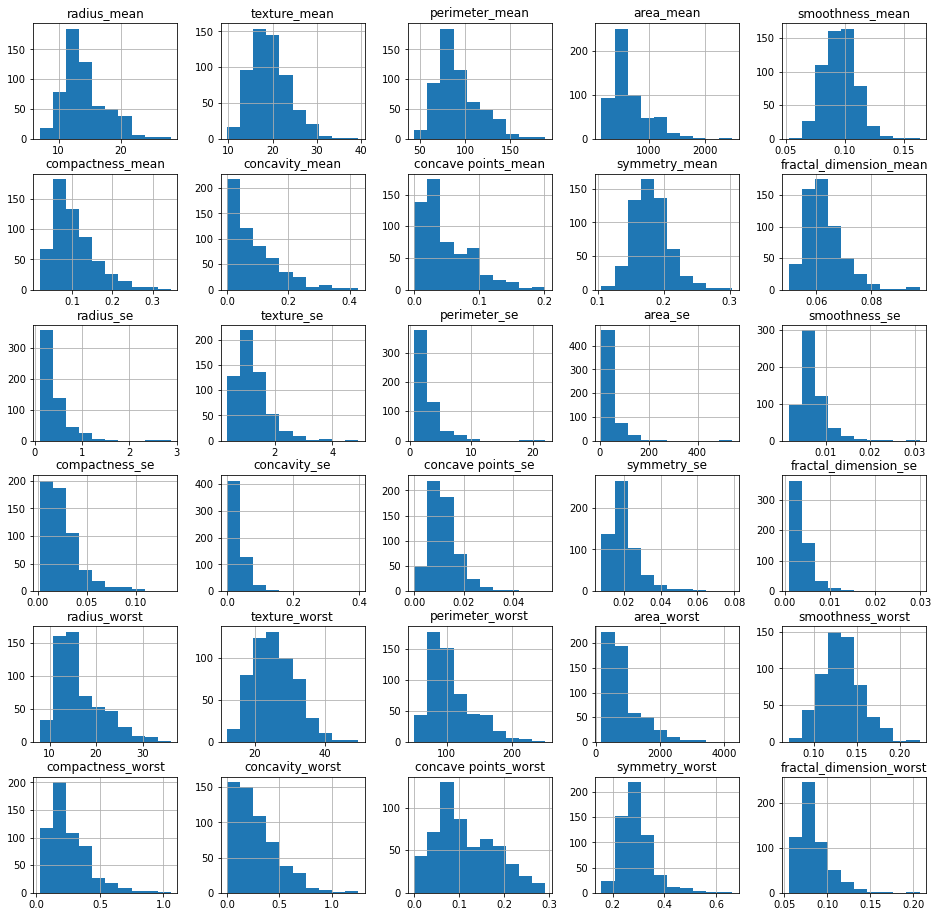

In [ ]:
_ = X.hist(figsize = (16,16))

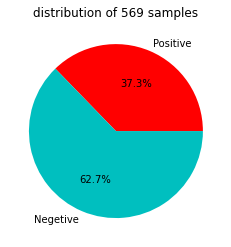

In [ ]:
num_of_positive = y.sum()
num_of_negetive = len(y) - num_of_positive
chart = [num_of_positive, num_of_negetive]
plt.pie(chart,labels=['Positive','Negetive'], autopct='%1.1f%%', shadow=False, colors =['r','c'] )
plt.title("distribution of "+str(len(y))+" samples")
plt.show()

## Standardize

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Train-Validation-Test separation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

print(f'Train shapes: X:{X_train.shape}, y:{y_train.shape}')
print(f'Val shapes: X:{X_val.shape}, y:{y_val.shape}')
print(f'Test shapes: X:{X_test.shape}, y:{y_test.shape}')

Train shapes: X:(455, 30), y:(455,)
Val shapes: X:(57, 30), y:(57,)
Test shapes: X:(57, 30), y:(57,)


## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_embedded_X = pca.fit_transform(X)
pca_embedded_X.shape

(569, 2)

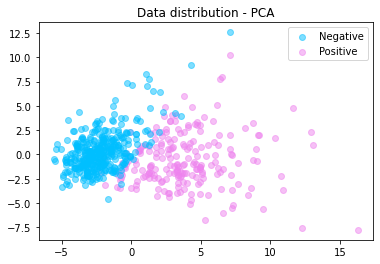

In [ ]:
plt.scatter(pca_embedded_X[:,0][y==0], pca_embedded_X[:,1][y==0], c='deepskyblue', label='Negative', alpha=0.5, zorder=4)
plt.scatter(pca_embedded_X[:,0][y==1], pca_embedded_X[:,1][y==1], c='violet', label='Positive', alpha=0.5, zorder=3)
plt.title('Data distribution - PCA')
plt.legend()

In [ ]:
from sklearn.manifold import TSNE

tsne_embedded_X = TSNE(n_components=2, learning_rate='auto',
                       init='random', perplexity=3).fit_transform(X)

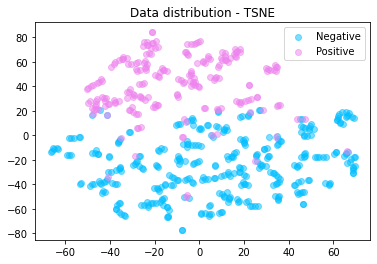

In [ ]:
plt.scatter(tsne_embedded_X[:,0][y==0], tsne_embedded_X[:,1][y==0], c='deepskyblue', alpha=0.5, label='Negative')
plt.scatter(tsne_embedded_X[:,0][y==1], tsne_embedded_X[:,1][y==1], c='violet', alpha=0.5, label='Positive')
plt.title('Data distribution - TSNE')
plt.legend()

## KMeans

In [ ]:
sse_score = []
max_k = 10
for k in range(1,max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    clusters = kmeans.predict(X)
    sse_score.append(kmeans.inertia_)

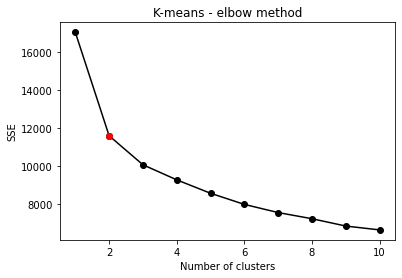

In [ ]:
plt.plot(range(1,max_k+1), sse_score, c='k', marker='o', zorder=3)
plt.scatter(2, sse_score[1], marker='o', c='r', zorder=5)
plt.ylabel('SSE')
plt.xlabel('Number of clusters')
plt.title('K-means - elbow method')
plt.show()

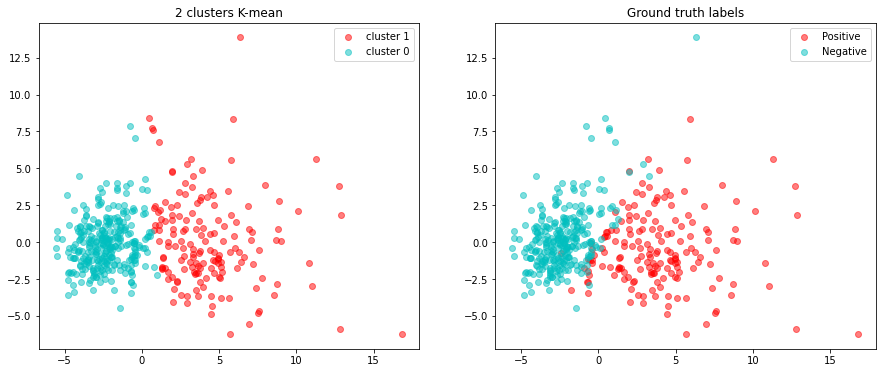

In [ ]:
pca = PCA(n_components=2)
embedded_X_train = pca.fit_transform(X_train)
embedded_X_val = pca.transform(X_val)
embedded_X_test = pca.transform(X_test)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clusters = kmeans.predict(X_train)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(embedded_X_train[:,0][clusters==1], embedded_X_train[:,1][clusters==1], c='r', alpha=0.5, label='cluster 1', zorder=3)
axs[0].scatter(embedded_X_train[:,0][clusters==0], embedded_X_train[:,1][clusters==0], c='c', alpha=0.5, label='cluster 0', zorder=4)
axs[0].title.set_text('2 clusters K-mean')
axs[0].legend()

axs[1].scatter(embedded_X_train[:,0][y_train==1], embedded_X_train[:,1][y_train==1], c='r', alpha=0.5, label='Positive', zorder=3)
axs[1].scatter(embedded_X_train[:,0][y_train==0], embedded_X_train[:,1][y_train==0], c='c', alpha=0.5, label='Negative', zorder=4)
axs[1].title.set_text('Ground truth labels')
axs[1].legend()

plt.show()

In [ ]:
test_clusters = kmeans.predict(X_test)
kmeans_acc = accuracy_score(y_true=y_test, y_pred=test_clusters)
print(f'KMeans accuracy: {round(kmeans_acc,3)*100:.1f}%')

KMeans accuracy: 89.5%


## SVM

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accs = {}
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, C=1000)
    clf.fit(X_train, y_train)
    svm_preds = clf.predict(X_val)
    svm_acc = accuracy_score(y_true=y_val, y_pred=svm_preds)
    kernel_accs[kernel] = svm_acc

In [ ]:
for kernel, k_acc in kernel_accs.items():
    print(f'SVM with {kernel} kernel validation accuracy: {round(k_acc,3)*100:.1f}%')    

SVM with linear kernel validation accuracy: 93.0%
SVM with poly kernel validation accuracy: 93.0%
SVM with rbf kernel validation accuracy: 94.7%
SVM with sigmoid kernel validation accuracy: 86.0%


In [ ]:
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X_train, y_train)
svm_preds = clf.predict(X_test)
svm_acc = accuracy_score(y_true=y_test, y_pred=svm_preds)
print(f'SVM with rbf kernel test accuracy: {round(svm_acc,3)*100:.1f}%')    

SVM with rbf kernel test accuracy: 96.5%


### Visualizations

In [ ]:
def plot_svm(kernel):
    clf = svm.SVC(kernel=kernel, C=1000)
    clf.fit(embedded_X_train, y_train)
    
    plt.figure(figsize=(15,10))
    plt.scatter(embedded_X_train[:,0][y_train==1], embedded_X_train[:,1][y_train==1], c='purple', alpha=0.8, label='Positive Train', zorder=3)
    plt.scatter(embedded_X_test[:,0][y_test==1], embedded_X_test[:,1][y_test==1], c='blue', alpha=0.8, label='Positive Test', zorder=3)
    plt.scatter(embedded_X_train[:,0][y_train==0], embedded_X_train[:,1][y_train==0], c='yellow', alpha=0.8, label='Negative Train', zorder=4)
    plt.scatter(embedded_X_test[:,0][y_test==0], embedded_X_test[:,1][y_test==0], c='darkorange', alpha=0.8, label='Negative Test', zorder=4)
    plt.title(f"SVM with {kernel} kernel")
    
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        pca_embedded_X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )

    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

    plt.legend()
    plt.show()

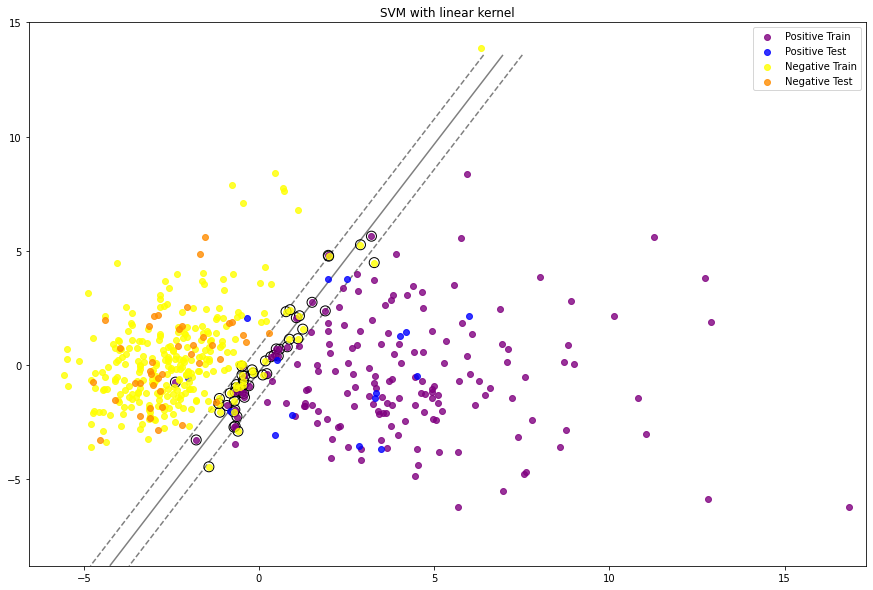

In [ ]:
plot_svm(kernel='linear')

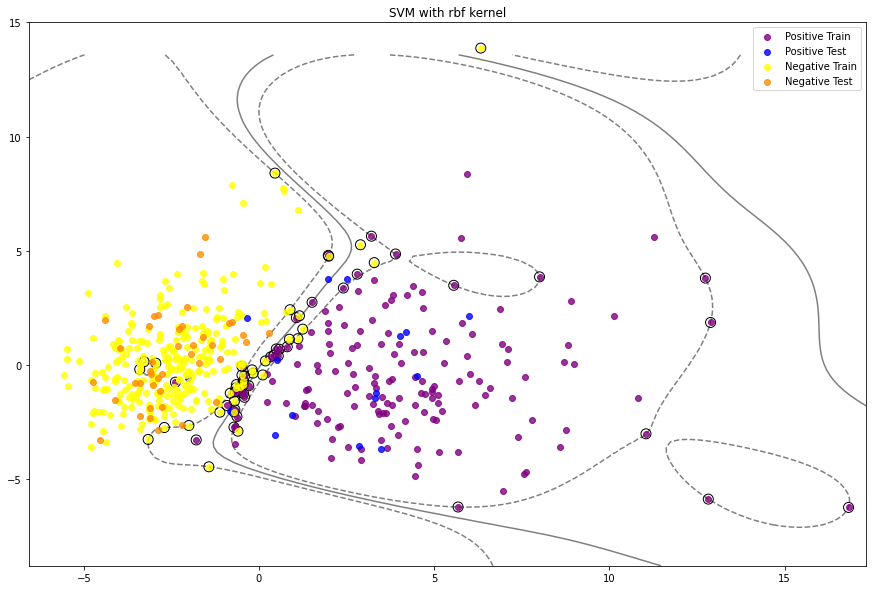

In [ ]:
plot_svm(kernel='rbf')

## Neural Network

In [ ]:
def model_create(activation_key):
    model = Sequential()
    model.add(Dense(12, input_shape=(30,), activation=activation_key))
    model.add(Dense(8, activation=activation_key))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=3, verbose=0)
    print(activation_key+": Done")
    return model, history

model_relu, history_relu = model_create('relu')
model_tanh, history_tanh = model_create('tanh')
model_selu, history_selu = model_create('selu')

relu: Done
tanh: Done
selu: Done


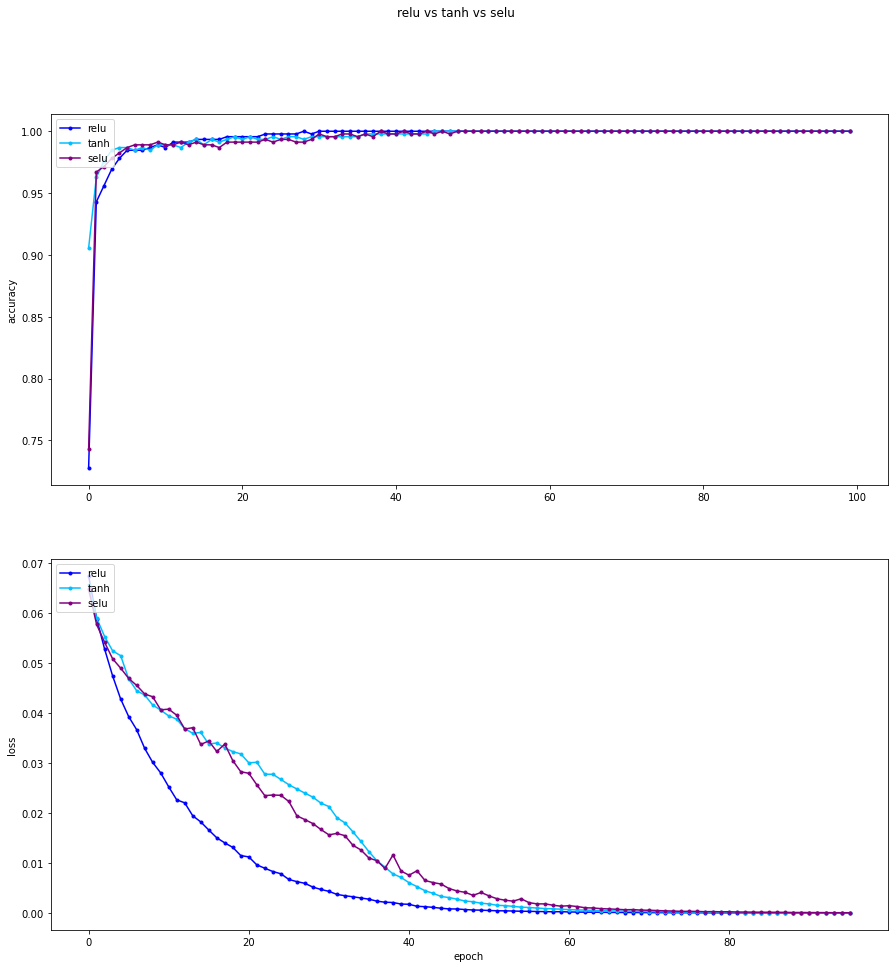

In [ ]:
fig, axs = plt.subplots(2,figsize=(15,15))
fig.suptitle('relu vs tanh vs selu')

axs[0].plot(history_relu.history['accuracy'], 'blue', marker = ".")
axs[0].plot(history_tanh.history['accuracy'], 'deepskyblue', marker = ".")
axs[0].plot(history_selu.history['accuracy'], 'purple', marker = ".")
axs[0].set (ylabel='accuracy')
axs[0].legend(['relu', 'tanh','selu'], loc='upper left')
axs[1].plot(history_relu.history['loss'][4:], 'blue', marker = ".")
axs[1].plot(history_tanh.history['loss'][4:], 'deepskyblue', marker = ".")
axs[1].plot(history_selu.history['loss'][4:], 'purple', marker = ".")
axs[1].set (ylabel='loss')
axs[1].legend(['relu', 'tanh','selu'], loc='upper left')
plt.xlabel('epoch')
plt.show()

In [ ]:
def calculate_accuracy(model, name):
    val_pred = model.predict(X_val)
    val_pred = np.array([0 if n <= .5 else 1 for n in val_pred])
    acc = accuracy_score(y_val, val_pred)
    return val_pred, acc

#using relu:
pred_relu, acc_relu = calculate_accuracy(model_relu, 'relu')
#using tanh:
pred_tanh, acc_tanh = calculate_accuracy(model_tanh, 'tanh')
#using selu:
pred_selu, acc_selu = calculate_accuracy(model_selu, 'selu')
predictions = [pred_relu,pred_tanh,pred_selu]

2/2 [==============================] - 0s 851us/step


In [ ]:
print(f'Using relu, the train accuracy is: {round(history_relu.history["accuracy"][-1]*100,2)}%')
print(f'Using tanh, the train accuracy is: {round(history_tanh.history["accuracy"][-1]*100,2)}%')
print(f'Using selu, the train accuracy is: {round(history_selu.history["accuracy"][-1]*100,2)}%')
print()
print(f'Using relu, the validation accuracy is: {round(acc_relu*100,2)}%')
print(f'Using tanh, the validation accuracy is: {round(acc_tanh*100,2)}%')
print(f'Using selu, the validation accuracy is: {round(acc_selu*100,2)}%')

Using relu, the train accuracy is: 100.0%
Using tanh, the train accuracy is: 100.0%
Using selu, the train accuracy is: 100.0%

Using relu, the validation accuracy is: 94.74%
Using tanh, the validation accuracy is: 98.25%
Using selu, the validation accuracy is: 94.74%


In [ ]:
test_pred = model_tanh.predict(X_test)
test_pred = np.array([0 if n <= .5 else 1 for n in test_pred])
test_acc = accuracy_score(y_test, test_pred)

2/2 [==============================] - 0s 1ms/step


In [ ]:
print(f'Using relu, the test accuracy is: {round(test_acc*100,2)}%')

Using relu, the test accuracy is: 98.25%
